<a href="https://colab.research.google.com/github/MalyalaAnand/DATA-MINING/blob/main/lab_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [13]:
np.random.seed(42)
data = np.random.normal(0, 1, 100)
outliers = np.random.uniform(5, 10, 5)
data_with_outliers = np.concatenate([data, outliers])

In [14]:
print(data)

[ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337 -0.23413696
  1.57921282  0.76743473 -0.46947439  0.54256004 -0.46341769 -0.46572975
  0.24196227 -1.91328024 -1.72491783 -0.56228753 -1.01283112  0.31424733
 -0.90802408 -1.4123037   1.46564877 -0.2257763   0.0675282  -1.42474819
 -0.54438272  0.11092259 -1.15099358  0.37569802 -0.60063869 -0.29169375
 -0.60170661  1.85227818 -0.01349722 -1.05771093  0.82254491 -1.22084365
  0.2088636  -1.95967012 -1.32818605  0.19686124  0.73846658  0.17136828
 -0.11564828 -0.3011037  -1.47852199 -0.71984421 -0.46063877  1.05712223
  0.34361829 -1.76304016  0.32408397 -0.38508228 -0.676922    0.61167629
  1.03099952  0.93128012 -0.83921752 -0.30921238  0.33126343  0.97554513
 -0.47917424 -0.18565898 -1.10633497 -1.19620662  0.81252582  1.35624003
 -0.07201012  1.0035329   0.36163603 -0.64511975  0.36139561  1.53803657
 -0.03582604  1.56464366 -2.6197451   0.8219025   0.08704707 -0.29900735
  0.09176078 -1.98756891 -0.21967189  0.35711257  1

In [15]:
print(data_with_outliers)

[ 4.96714153e-01 -1.38264301e-01  6.47688538e-01  1.52302986e+00
 -2.34153375e-01 -2.34136957e-01  1.57921282e+00  7.67434729e-01
 -4.69474386e-01  5.42560044e-01 -4.63417693e-01 -4.65729754e-01
  2.41962272e-01 -1.91328024e+00 -1.72491783e+00 -5.62287529e-01
 -1.01283112e+00  3.14247333e-01 -9.08024076e-01 -1.41230370e+00
  1.46564877e+00 -2.25776300e-01  6.75282047e-02 -1.42474819e+00
 -5.44382725e-01  1.10922590e-01 -1.15099358e+00  3.75698018e-01
 -6.00638690e-01 -2.91693750e-01 -6.01706612e-01  1.85227818e+00
 -1.34972247e-02 -1.05771093e+00  8.22544912e-01 -1.22084365e+00
  2.08863595e-01 -1.95967012e+00 -1.32818605e+00  1.96861236e-01
  7.38466580e-01  1.71368281e-01 -1.15648282e-01 -3.01103696e-01
 -1.47852199e+00 -7.19844208e-01 -4.60638771e-01  1.05712223e+00
  3.43618290e-01 -1.76304016e+00  3.24083969e-01 -3.85082280e-01
 -6.76922000e-01  6.11676289e-01  1.03099952e+00  9.31280119e-01
 -8.39217523e-01 -3.09212376e-01  3.31263431e-01  9.75545127e-01
 -4.79174238e-01 -1.85658

In [20]:
df = pd.DataFrame(data_with_outliers, columns=['Value'])
df

,Value
0,0.496714
1,-0.138264
2,0.647689
3,1.523030
4,-0.234153
...,...
100,7.087055
101,6.110539
102,5.599327
103,6.688076


In [17]:
Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [21]:
print(Q1)
print(Q3)
print(IQR)
print(lower_bound)
print(upper_bound)

-0.5622875292409727
0.6116762888408679
1.1739638180818406
-2.3232332563637335
2.372622015963629


In [26]:
outliers_iqr = df[(df['Value'] < lower_bound) | (df['Value'] > upper_bound)]

Empty DataFrame
Columns: [Value]
Index: []


In [29]:
z_scores = stats.zscore(df['Value'])
outliers_zscore = df[np.abs(z_scores) > 3]

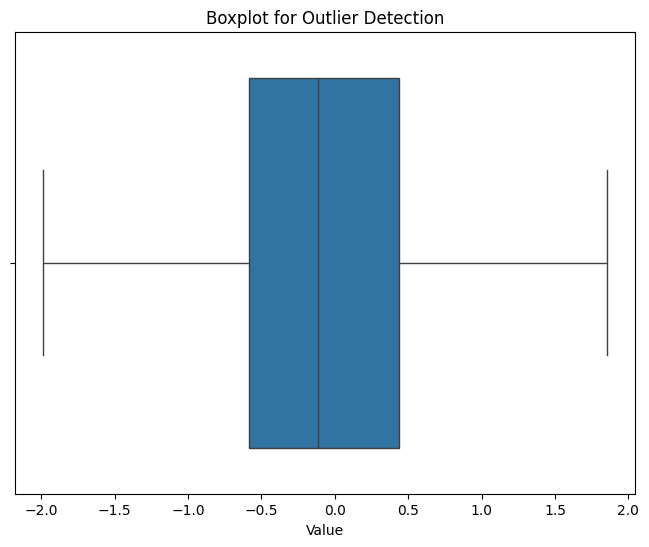

In [30]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Value'])
plt.title("Boxplot for Outlier Detection")
plt.show()

In [33]:
df_capped = df.copy()
df_capped['Value'] = np.clip(df_capped['Value'], lower_bound, upper_bound)
df_capped

,Value
0,0.496714
1,-0.138264
2,0.647689
3,1.523030
4,-0.234153
...,...
95,-1.463515
96,0.296120
97,0.261055
98,0.005113


In [35]:
df_removed = df.copy()
df_removed = df_removed[(df_removed['Value'] >= lower_bound) &
(df_removed['Value'] <= upper_bound)]
df_removed

,Value
0,0.496714
1,-0.138264
2,0.647689
3,1.523030
4,-0.234153
...,...
95,-1.463515
96,0.296120
97,0.261055
98,0.005113


In [37]:
df_imputed = df.copy()
median_value = df['Value'].median()
df_imputed['Value'] = np.where((df_imputed['Value'] < lower_bound) |
(df_imputed['Value'] > upper_bound), median_value, df_imputed['Value'])
df_imputed

,Value
0,0.496714
1,-0.138264
2,0.647689
3,1.523030
4,-0.234153
...,...
95,-1.463515
96,0.296120
97,0.261055
98,0.005113


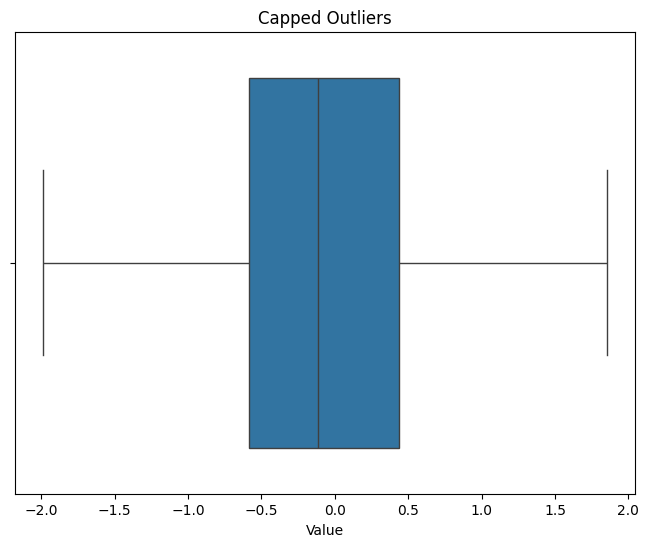

In [38]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_capped['Value'])
plt.title("Capped Outliers")
plt.show()

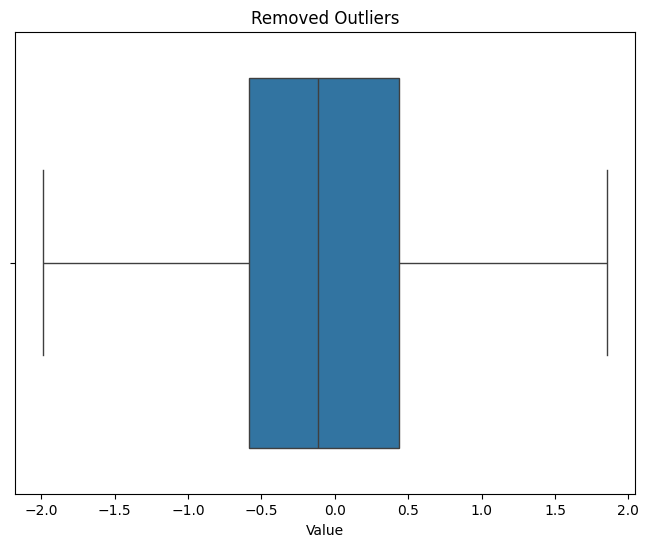

In [39]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_removed['Value'])
plt.title("Removed Outliers")
plt.show()

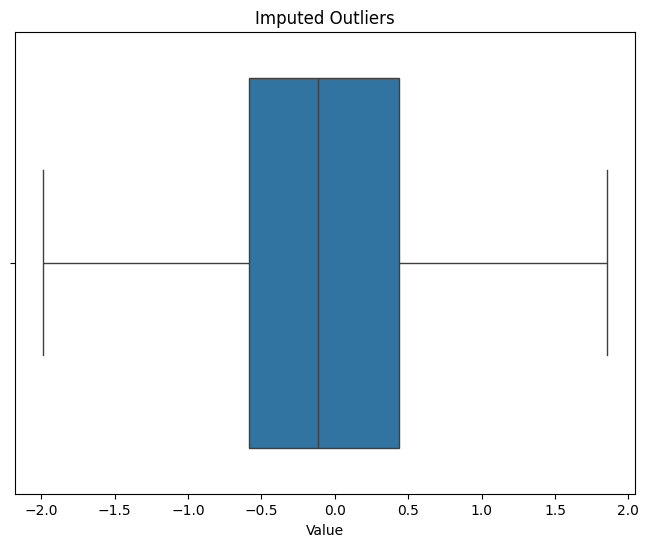

In [40]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_imputed['Value'])
plt.title("Imputed Outliers")
plt.show()

In [41]:
print(f"Outliers detected using IQR:\n{outliers_iqr}")
print(f"Outliers detected using Z-Score:\n{outliers_zscore}")

Outliers detected using IQR:
Empty DataFrame
Columns: [Value]
Index: []
Outliers detected using Z-Score:
Empty DataFrame
Columns: [Value]
Index: []
